# Introduction and About This Project
---
**Author**: Brandon Alvarado

**Contact**:
-	[LinkedIn]( https://www.linkedin.com/in/brandon-alvarado91/)
-	[GitHub]( https://github.com/bjalvarado)

**Last Revised Date**: 1/7/2025

This project uses **real-world public data** from the **National Vital Statistics System**, which reports mortality rates by county related to **cardiovascular disease** (i.e., heart attack, stroke).  

You can find the dataset [here](https://catalog.data.gov/dataset/heart-disease-mortality-data-among-us-adults-35-by-state-territory-and-county-2019-2021?utm_).

In addition to real data, this project includes **hypothetical data** with no primary evidence, which I arbitrarily decided upon for learning purposes. Therefore, the results and conclusions should not be used for real-world applications.  

The primary objective of this project is to demonstrate my ability to:
- **Clean and manage data** using Python.
- **Perform data analysis**.
- **Create clear visualizations** to communicate insights.

This project is intended as a **learning exercise** in data analysis and visualization.


In [28]:
# Run this to import all the necessary libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Importing the data
data = pd.read_csv('N:/Users/alva0/Desktop/Coding Practice/PyData/CV_HEALTHECONOMICS_PROJ/data/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv')
print(data.head())

   Year LocationAbbr           LocationDesc GeographicLevel DataSource  \
0  2020           AK        Kenai Peninsula          County       NVSS   
1  2020           AL          Walker County          County       NVSS   
2  2020           AL       St. Clair County          County       NVSS   
3  2020           AR            Yell County          County       NVSS   
4  2020           AS  American Samoa County          County       NVSS   

                     Class                    Topic  Data_Value  \
0  Cardiovascular Diseases  Heart Disease Mortality       165.1   
1  Cardiovascular Diseases  Heart Disease Mortality       109.0   
2  Cardiovascular Diseases  Heart Disease Mortality        90.0   
3  Cardiovascular Diseases  Heart Disease Mortality         NaN   
4  Cardiovascular Diseases  Heart Disease Mortality         NaN   

          Data_Value_Unit                                    Data_Value_Type  \
0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Aver

In [21]:
# Checking the data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  34430 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  44362 non-null  object 
 11  Data_Value_Footnote         44362 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [22]:
# To view the missing values
print(data.isnull().sum())

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    44362
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    34430
Data_Value_Footnote           34430
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Y_lat                            24
X_lon                            24
Georeference                     24
dtype: int64


In [23]:
# Since Data_Value (most important) contains a lot of missing values, we will drop those missing values from analysis
# A few columns are not useful for analysis, we will drop those columns as well:
columns_to_drop = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Data_Value_Footnote', 'Georeference' ]
data = data.drop(columns=columns_to_drop)

# Drop rows with missing values in Data_Value column
data = data.dropna(subset=['Data_Value'])

# Display cleaned data preview
print("\nCleaned Dataset:")
print(data.head())



Cleaned Dataset:
   Year LocationAbbr      LocationDesc GeographicLevel DataSource  \
0  2020           AK   Kenai Peninsula          County       NVSS   
1  2020           AL     Walker County          County       NVSS   
2  2020           AL  St. Clair County          County       NVSS   
5  2020           FL       Polk County          County       NVSS   
6  2020           GA    Forsyth County          County       NVSS   

                     Class                    Topic  Data_Value  \
0  Cardiovascular Diseases  Heart Disease Mortality       165.1   
1  Cardiovascular Diseases  Heart Disease Mortality       109.0   
2  Cardiovascular Diseases  Heart Disease Mortality        90.0   
5  Cardiovascular Diseases  Heart Disease Mortality       180.2   
6  Cardiovascular Diseases  Heart Disease Mortality       133.5   

          Data_Value_Unit                                    Data_Value_Type  \
0  per 100,000 population  Age-adjusted, Spatially Smoothed, 3-year Avera...   
1  p

In [24]:
# We will extract the top 20% of the counties with the highest heart disease mortality rates (this includes some state data as well)
county_data = data[data['GeographicLevel'] == 'County']

# Sort by mortality (Data_Value) in descending order
county_data = county_data.sort_values(by='Data_Value', ascending=False)

# Calculate the 20% threshold
threshold = int(0.2 * len(county_data))

# Extract the top 20% of the counties
top_20_percent = county_data.head(threshold)

# Display the preview of top 20% of the counties
print("\nTop 20% of Counties with the Highest Heart Disease Mortality Rates:")
print(top_20_percent.head())

#print(top_20_percent) # if you want to see all the data


Top 20% of Counties with the Highest Heart Disease Mortality Rates:
       Year LocationAbbr           LocationDesc GeographicLevel DataSource  \
73489  2020           VA      Martinsville City          County       NVSS   
60213  2020           PA  Northumberland County          County       NVSS   
58188  2020           OK        Sequoyah County          County       NVSS   
6822   2020           GA          Clinch County          County       NVSS   
39803  2020           ND           Sioux County          County       NVSS   

                         Class                    Topic  Data_Value  \
73489  Cardiovascular Diseases  Heart Disease Mortality      3203.9   
60213  Cardiovascular Diseases  Heart Disease Mortality      1972.6   
58188  Cardiovascular Diseases  Heart Disease Mortality      1845.9   
6822   Cardiovascular Diseases  Heart Disease Mortality      1813.6   
39803  Cardiovascular Diseases  Heart Disease Mortality      1790.9   

              Data_Value_Unit  \
73

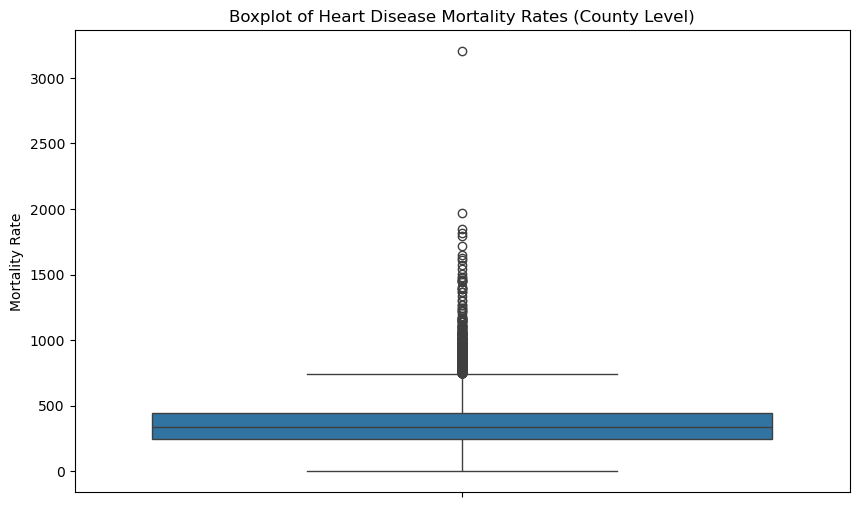

In [29]:
# Plotting a boxplot to visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=county_data, y='Data_Value')
plt.title('Boxplot of Heart Disease Mortality Rates (County Level)')
plt.ylabel('Mortality Rate')
plt.show()

# Due to the nature of this project, outliers represent important data points and will not be removed as they represent potential areas of interest for further analysis.

### **Assumptions and Purpose of Analysis**

This project is a **recreational data analysis exercise** intended for my own learning purposes, specifically to practice data cleaning, analysis, and visualization using Python. Although previous data is **real** public data from the CDC, this is not intended for actual research or professional use, several assumptions have been made for simplicity of the analysis:

1. **Hospitalizations per Death**  
   It is assumed that for every **1 heart disease-related death**, there are **10 hospitalizations**. This ratio is purely hypothetical and arbitrary and used to simulate the potential healthcare burden from cardiac related deaths.

2. **Cost per Hospitalization**  
   An **average cost of $20,000 per heart disease-related hospitalization** is assumed. This value is not based on real-world data but is chosen for the purpose of illustrating the potential economic impact of reducing heart disease mortality (again, a completely arbitrary number chosen by myself for learning purposes).

3. **Mortality Reduction Impact**  
   The analysis assumes that a **10% reduction in mortality** will result in a **proportional 10% reduction in hospitalizations**, leading to cost savings.

---

### **Important Note**  
These assumptions are **not based on peer-reviewed research** or real-world data. The purpose of this project is solely to demonstrate the process of working with data and performing a basic health economics analysis. Any conclusions drawn from this analysis are purely hypothetical. This being said, using these assumptions, the next part of this project I will now determine the estimated increase in hospital spending for the selected counties.


In [30]:
# Now we will pull the top 5 counties with the highest heart disease mortality rates to estimate potential hospital savings from our hypothetical data above

# First let's take the most important columns to include, I will be adding in estimated hospitalizations and costs
summary_columns = [
    'LocationDesc',
    'LocationAbbr',
    'Data_Value',
    'Estimated_Hospitalizations', # New columns
    'Reduced_Hospitalizations', # New columns
    'Estimated_Costs', # New columns
    'Reduced_Costs' # New columns
    ]

# Using the hypothetical data, we need to assign some variables to calculate our desired values

# Our assumptions with constants
hospitalization_per_death = 10 # 10 hospitalizations per death
cost_per_hospitalization = 20000 # $20,000 per hospitalization
mortality_reduction = 0.1 # 10% reduction in mortality rate (this is our 'goal' to represent potential savings)

# Estimated hospitalizations per county
top_20_percent['Estimated_Hospitalizations'] = top_20_percent['Data_Value'] * hospitalization_per_death # standardized to be per 100,000

# Estimated reduction in hospitilizations due to mortality reduction
top_20_percent['Reduced_Hospitalizations'] = top_20_percent['Estimated_Hospitalizations'] * mortality_reduction # standardized to be per 100,000

# Estimated costs per county in hospitalizations
top_20_percent['Estimated_Costs'] = top_20_percent['Estimated_Hospitalizations'] * cost_per_hospitalization # standardized to be per 100,000

# Estimated costs per county in hospitalizations with mortality reduction
top_20_percent['Reduced_Costs'] = top_20_percent['Reduced_Hospitalizations'] * cost_per_hospitalization # standardized to be per 100,000

# Display the summary of the top 5 high-risk counties
print('\nSummary of Top 5 High-Risk Counties:')
print(top_20_percent[summary_columns].head())

# If you want to see more than the top 5, you can print the entire dataframe
#print(top_20_percent[summary_columns])


Summary of Top 5 High-Risk Counties:
                LocationDesc LocationAbbr  Data_Value  \
73489      Martinsville City           VA      3203.9   
60213  Northumberland County           PA      1972.6   
58188        Sequoyah County           OK      1845.9   
6822           Clinch County           GA      1813.6   
39803           Sioux County           ND      1790.9   

       Estimated_Hospitalizations  Reduced_Hospitalizations  Estimated_Costs  \
73489                     32039.0                    3203.9      640780000.0   
60213                     19726.0                    1972.6      394520000.0   
58188                     18459.0                    1845.9      369180000.0   
6822                      18136.0                    1813.6      362720000.0   
39803                     17909.0                    1790.9      358180000.0   

       Reduced_Costs  
73489     64078000.0  
60213     39452000.0  
58188     36918000.0  
6822      36272000.0  
39803     35818000.0  


C:\Users\alva0\AppData\Local\Temp\ipykernel_10760\600263194.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_percent['Estimated_Hospitalizations'] = top_20_percent['Data_Value'] * hospitalization_per_death # standardized to be per 100,000
C:\Users\alva0\AppData\Local\Temp\ipykernel_10760\600263194.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_percent['Reduced_Hospitalizations'] = top_20_percent['Estimated_Hospitalizations'] * mortality_reduction # standardized to be per 100,000
C:\U

In [31]:
# Round and make the data look more presentable
top_20_percent = top_20_percent.round({
    'Estimated_Hospitalizations': 0,
    'Reduced_Hospitalizations': 0,
    'Estimated_Costs': 0,
    'Reduced_Costs': 0
})

print('\nSummary of Top 5 High-Risk Counties (Rounded):')
print(top_20_percent[summary_columns].head())


Summary of Top 5 High-Risk Counties (Rounded):
                LocationDesc LocationAbbr  Data_Value  \
73489      Martinsville City           VA      3203.9   
60213  Northumberland County           PA      1972.6   
58188        Sequoyah County           OK      1845.9   
6822           Clinch County           GA      1813.6   
39803           Sioux County           ND      1790.9   

       Estimated_Hospitalizations  Reduced_Hospitalizations  Estimated_Costs  \
73489                     32039.0                    3204.0      640780000.0   
60213                     19726.0                    1973.0      394520000.0   
58188                     18459.0                    1846.0      369180000.0   
6822                      18136.0                    1814.0      362720000.0   
39803                     17909.0                    1791.0      358180000.0   

       Reduced_Costs  
73489     64078000.0  
60213     39452000.0  
58188     36918000.0  
6822      36272000.0  
39803     358

# **Data Visualization**:

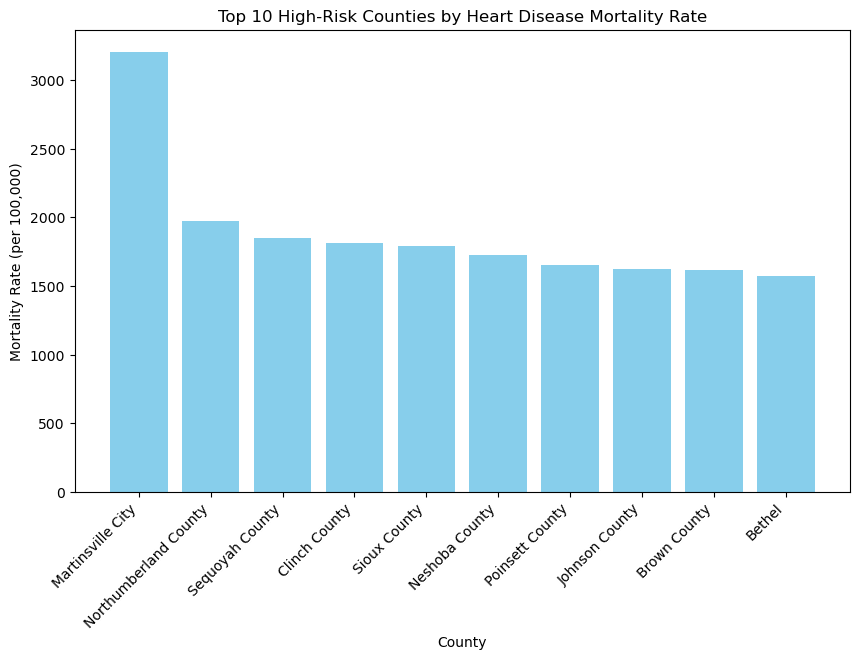

In [32]:
#import matplotlib.pyplot as plt

# Plotting the estimated costs for the top 10 high-risk counties
top_10_counties = top_20_percent.sort_values(by='Data_Value', ascending=False).head(10)

# Plot the bar chart for mortality rate
plt.figure(figsize=(10, 6))
plt.bar(top_10_counties['LocationDesc'], top_10_counties['Data_Value'], color='skyblue')
plt.title('Top 10 High-Risk Counties by Heart Disease Mortality Rate')
plt.xlabel('County')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xticks(rotation=45, ha='right')
plt.show()


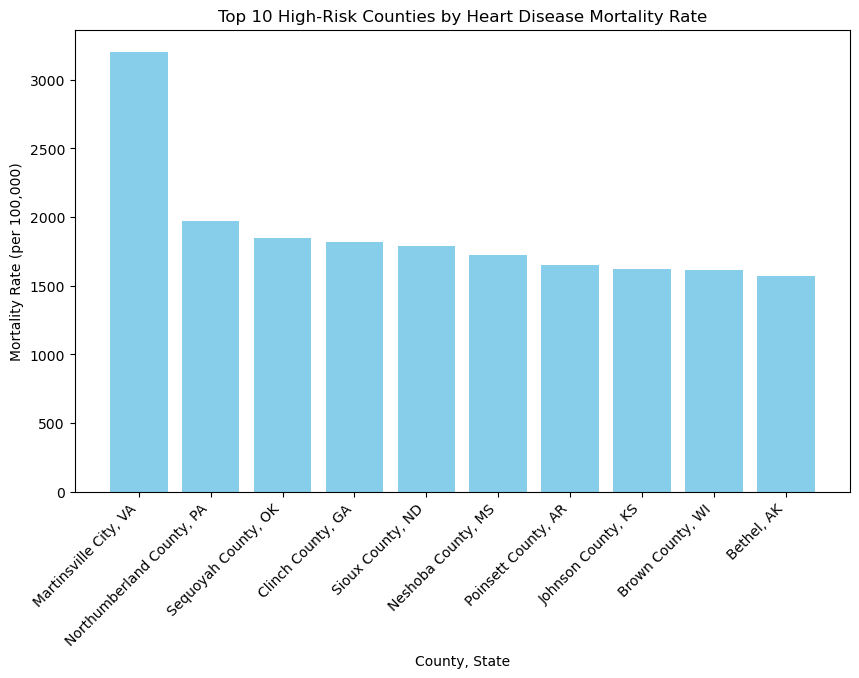

In [33]:
# This was good but I want to include the state abbreviation next to the county name

# Create a new column with the county name and state abbreviation
top_10_counties['County_State'] = top_10_counties['LocationDesc'] + ', ' + top_10_counties['LocationAbbr']

# Plot the bar chart for mortality rate with county and state abbreviation
plt.figure(figsize=(10, 6))
plt.bar(top_10_counties['County_State'], top_10_counties['Data_Value'], color='skyblue')
plt.title('Top 10 High-Risk Counties by Heart Disease Mortality Rate')
plt.xlabel('County, State')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xticks(rotation=45, ha='right')
plt.show()


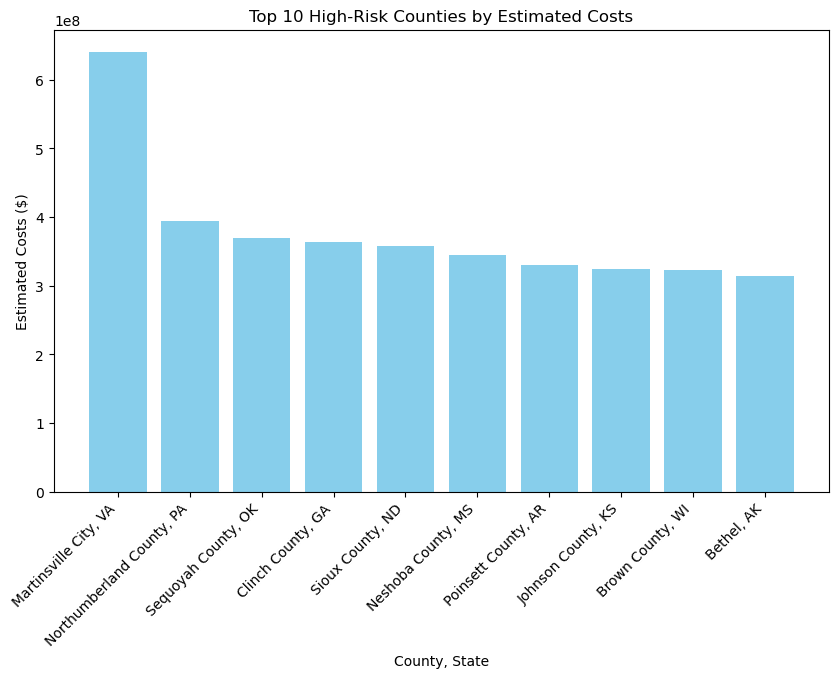

In [34]:
# Now one for cost savings

# Plot the bar chart for estimated costs with county (and state abbreviation)
plt.figure(figsize=(10, 6))
plt.bar(top_10_counties['County_State'], top_10_counties['Estimated_Costs'], color='skyblue')
plt.title('Top 10 High-Risk Counties by Estimated Costs')
plt.xlabel('County, State')
plt.ylabel('Estimated Costs ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

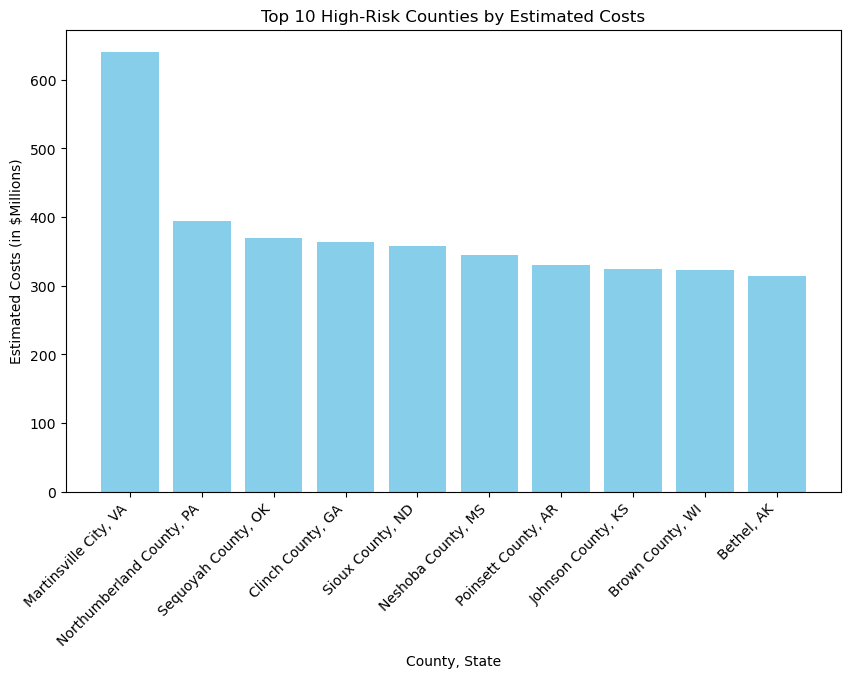

In [35]:
# Unfortunately the Y-axis was shown incorrectly, we will need to fix this

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    # The two args are the value and tick position
    return f'{x / 1000000:.0f}' # Divide by 1 million and round to 0 decimal places

# Plot the bar chart for estimated costs (in hundreds of billions) with county (and state abbreviation)
plt.figure(figsize=(10, 6))
plt.bar(top_10_counties['County_State'], top_10_counties['Estimated_Costs'], color='skyblue')
plt.title('Top 10 High-Risk Counties by Estimated Costs')
plt.xlabel('County, State')
plt.ylabel('Estimated Costs (in $Millions)')
plt.xticks(rotation=45, ha='right')

# Customize the Y-axis to show in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

In [36]:
# Finally, let's compare these top 10 counties to the average mortality rate and costs for all counties.
# Then we can see how much potential savings we could have if we reduced the mortality rate by 10% in these high-risk counties.

# Calculate the average mortality rate for all counties
average_mortality_rate = county_data['Data_Value'].mean()

# Calculate the average mortality rate for the top 10 counties
average_top_10_mor_rate = top_10_counties['Data_Value'].mean()

# Calculate the estimated hospitalizations and reduced hospitalizations for all counties
county_data['Estimated_Hospitalizations'] = county_data['Data_Value'] * hospitalization_per_death
county_data['Reduced_Hospitalizations'] = county_data['Estimated_Hospitalizations'] * mortality_reduction

# Calculate the average estimated costs for all counties
average_estimated_costs = (county_data['Estimated_Hospitalizations'] * cost_per_hospitalization).mean()

# Calculate the average estimated costs for the top 10 counties
average_top_10_costs = (top_10_counties['Estimated_Costs']).mean()

# Calculate the average estimated costs with mortality reduction for all counties
average_reduced_costs = (county_data['Reduced_Hospitalizations'] * cost_per_hospitalization).mean()

# Calculate the average estimated costs with mortality reduction for the top 10 counties
average_top_10_reduced_cost = (top_10_counties['Reduced_Costs']).mean()

# Display the results
print(f'\nAverage Mortality Rate for All Counties: {round(average_mortality_rate, 1)}, Average for Top 10 Counties: {round(average_top_10_mor_rate, 1)}') # rounding final values
print(f'\nAverage Predicted Costs for All Counties: {round(average_estimated_costs, -1)}, Average for Top 10 Counties: {round(average_top_10_costs, -1)}') # rounding final values
print(f'\nAverage Predicted Cost Reduction with Mortality Reduction for All Counties: -{round(average_reduced_costs, -1)}, Average for Top 10 Counties -{round(average_top_10_reduced_cost , -1)}')



Average Mortality Rate for All Counties: 353.8, Average for Top 10 Counties: 1880.4

Average Predicted Costs for All Counties: 70759170.0, Average for Top 10 Counties: 376070000.0

Average Predicted Cost Reduction with Mortality Reduction for All Counties: -7075920.0, Average for Top 10 Counties -37607000.0


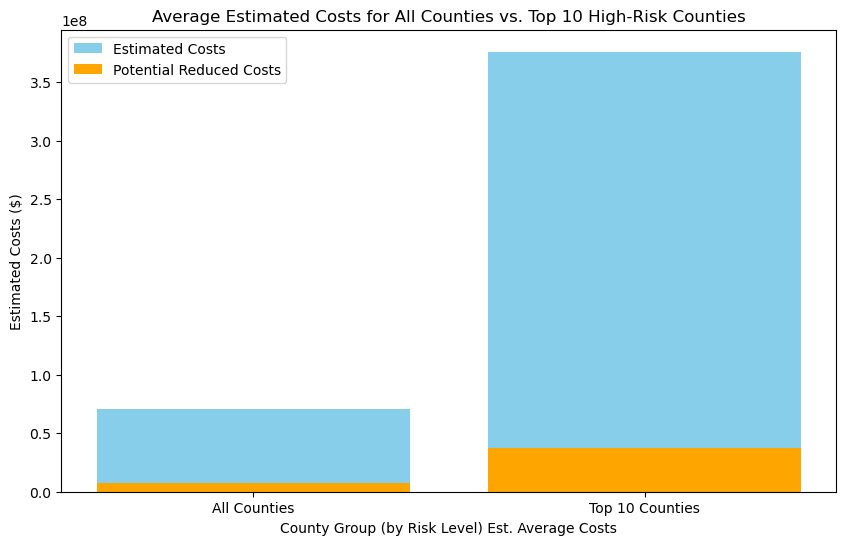

In [40]:
# Finally, let's visualize the potential cost savings for all counties compared to the top 10 high-risk counties from the findings above.

# Create a new dataframe with the average values for all counties and top 10 counties
average_data = pd.DataFrame({
    'LocationDesc': ['All Counties', 'Top 10 Counties'],
    'Data_Value': [average_mortality_rate, average_top_10_mor_rate],
    'Estimated_Costs': [average_estimated_costs, average_top_10_costs],
    'Reduced_Costs': [average_reduced_costs, average_top_10_reduced_cost]
})

# Plot the bar chart for estimated costs with county (and state abbreviation)
plt.figure(figsize=(10, 6))
plt.bar(average_data['LocationDesc'], average_data['Estimated_Costs'], color='skyblue', label='Estimated Costs')
plt.bar(average_data['LocationDesc'], average_data['Reduced_Costs'], color='orange', label='Potential Reduced Costs')
plt.title('Average Estimated Costs for All Counties vs. Top 10 High-Risk Counties')
plt.xlabel('County Group (by Risk Level) Est. Average Costs')
plt.ylabel('Estimated Costs ($)')
plt.legend()
plt.show()


# Final Findings and Thoughts
---

This project used a combination of real and hypothetical data to simulate the potential cost savings for hospitals through a **10% reduction in mortality rates** for local heart disease-related deaths. We assumed that **each heart disease-related death corresponds to an average of 10 associated hospitalizations**, which are known to impose significant costs on hospitals and insurance providers.

---

This project demonstrated my ability to perform **basic data analysis and visualization using Python**. It also reinforced my **intermediate Python skills** and proficiency with data visualization libraries. In the future, I plan to engage in more complex projects involving **machine learning** and **predictive modeling** to simulate future trends.

Thank you for taking the time to review this project!
